In [46]:
import os
import json
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Ajustes de estilo
sns.set(style="whitegrid")
plt.rcParams["figure.figsize"] = (10, 6)

# Ruta a la carpeta con resultados
results_dir = "results"

# Cargar todos los archivos JSON de resultados
data = {}
for filename in os.listdir(results_dir):
    if filename.endswith(".json"):
        with open(os.path.join(results_dir, filename)) as f:
            data[filename] = json.load(f)

# Mostrar los archivos cargados
print(f"Archivos cargados: {list(data.keys())}")


Archivos cargados: ['results_vm_20250523_185517.json', 'results_vm_20250523_185614.json', 'results_vm_20250523_185712.json', 'results_vm_20250523_185906.json', 'results_vm_20250523_190001.json', 'results_vm_20250523_190043.json', 'results_vm_20250523_190122.json', 'results_vm_20250523_190201.json', 'results_vm_20250523_190247.json', 'results_vm_20250523_190326.json', 'results_vm_20250523_190406.json', 'results_vm_20250523_190535.json', 'results_vm_20250523_190624.json', 'results_vm_20250523_190715.json', 'results_vm_20250523_190808.json', 'results_vm_20250523_190859.json', 'results_vm_20250523_190950.json', 'results_vm_20250523_191039.json', 'results_vm_20250523_191130.json', 'results_vm_20250523_191224.json']


In [47]:
# Convertir los resultados a un DataFrame
rows = []
for file, tests in data.items():
    source = "docker" if "docker" in file.lower() else "vm"
    for test_name, result in tests.items():
        if "error" not in result:
            rows.append({
                "source": source,
                "file": file,
                "test": test_name,
                "cpu": result["cpu"],
                "memory": result["memory"],
                "time": result["time"]
            })

df = pd.DataFrame(rows)
df.head()


,source,file,test,cpu,memory,time
0,vm,results_vm_20250523_185517.json,idle,19.2,5.972656,5.001093
1,vm,results_vm_20250523_185517.json,cpu_stress,17.0,24.019531,5.072340
2,vm,results_vm_20250523_185517.json,cpu_multi,100.0,16.648438,5.836694
3,vm,results_vm_20250523_185517.json,memory_stress,47.2,1030.621094,5.651975
4,vm,results_vm_20250523_185517.json,memory_large,8.6,59.925781,4.002061


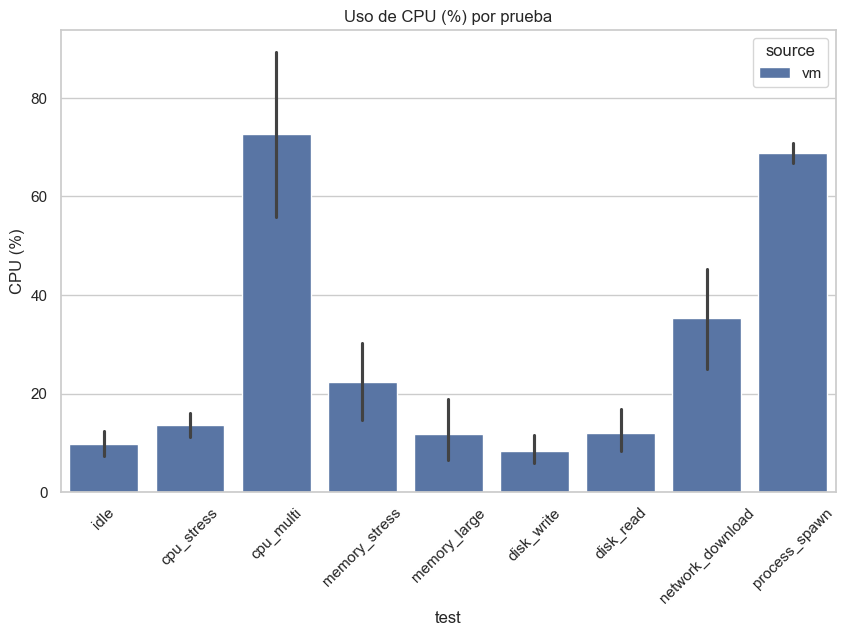

In [48]:
plt.figure()
sns.barplot(data=df, x="test", y="cpu", hue="source")
plt.title("Uso de CPU (%) por prueba")
plt.xticks(rotation=45)
plt.ylabel("CPU (%)")
plt.show()


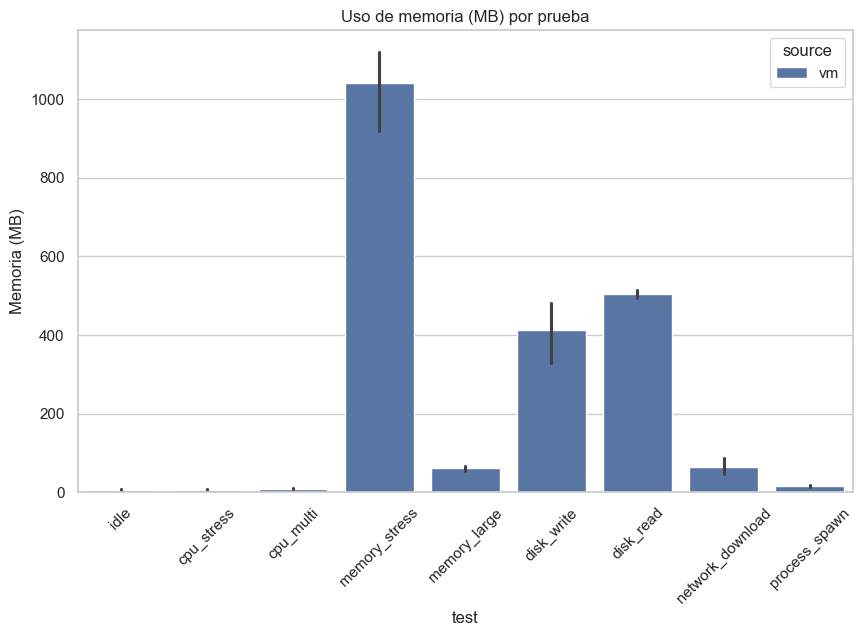

In [49]:
plt.figure()
sns.barplot(data=df, x="test", y="memory", hue="source")
plt.title("Uso de memoria (MB) por prueba")
plt.xticks(rotation=45)
plt.ylabel("Memoria (MB)")
plt.show()


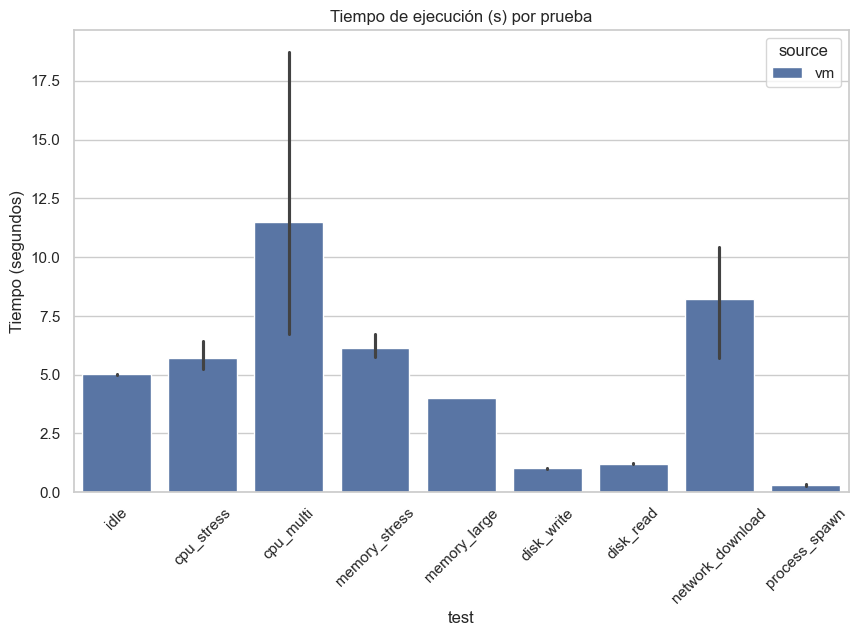

In [50]:
plt.figure()
sns.barplot(data=df, x="test", y="time", hue="source")
plt.title("Tiempo de ejecución (s) por prueba")
plt.xticks(rotation=45)
plt.ylabel("Tiempo (segundos)")
plt.show()


In [51]:
summary = df.groupby(["source", "test"]).agg(
    cpu_mean=("cpu", "mean"),
    cpu_std=("cpu", "std"),
    memory_mean=("memory", "mean"),
    memory_std=("memory", "std"),
    time_mean=("time", "mean"),
    time_std=("time", "std")
).reset_index()

summary


,source,test,cpu_mean,cpu_std,memory_mean,memory_std,time_mean,time_std
0,vm,cpu_multi,72.765,38.906450,9.270508,5.517218,11.506110,14.332257
1,vm,cpu_stress,13.590,5.740521,6.818945,4.845217,5.717163,1.472104
2,vm,disk_read,11.990,10.149249,505.043164,25.172241,1.214702,0.088881
3,vm,disk_write,8.400,6.982987,411.911133,176.196023,1.011397,0.070597
4,vm,idle,9.840,6.023323,6.557031,5.459678,5.006185,0.010723
5,vm,memory_large,11.885,14.775772,61.318164,14.921334,4.012103,0.014218
6,vm,memory_stress,22.270,18.045209,1041.534375,257.646918,6.139355,1.227114
7,vm,network_download,35.340,23.143406,65.290430,49.918884,8.210983,5.514433
8,vm,process_spawn,68.870,4.947205,16.815430,5.848192,0.302680,0.113280
